<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 02: Julia lab - unconstrained optimization </font></p>
</p></br>
</p>
</CENTER>

----------------------------

In this lab, we want first to test the benefit of backtracking against constant stepsize for gradient or newton algorithms. Then, we will consider the behavior of conjugate-gradient and Polack-Ribière technique that work without knowledge of the Hessian matrix of the function to be optimized.

## <span style="color:#00B8DE"> I - Function plot </span>

**1)** Let us consider the function $f(x,y)=[(x-2)\sin(y-1)]^2+x^2+y^2$. 
Visualize this function on the square with vertices $(\pm 3,\pm 3)$.

## <span style="color:#00B8DE"> II - Backtracking </span>

**2)** Testing the benefit of backtracking. Calculate gradient of this function and implement gradient algorithm
for constant stepsize equal to .1 and then .01 and using backtracking. Compare the numbers of iterations necessary for convergence with initialization at point $(−4, -2)$ and residual error for the distance to the optimum smaller than $10^{−3}$.

## <span style="color:#00B8DE"> III - Gradient and Newton </span>
**3)** Implement Newton algorithm with backtracking to minimize $f(x,y)$ and compare results to gradient algorithm with backtracking.

## <span style="color:#00B8DE"> IV - Conjugate gradient </span>
**4)** Implement the conjugate-gradient algorithm and test it on a simple quadratic function $p({\bf x})=\frac 1 2 {\bf x^TAx}-{\bf x^Tb}$ with ${\bf A} = [1\; 0;0\; 5]$ and ${\bf b}=[1; 1]$.How many steps are required for convergence ? 

**5)** Consider a larger problem where 

        n = 10  # 100
        
        a = randn(n,n)
        
        A = a'*a + diagm(0=>ones(n)) # A = a'*a
        
        b = randn(n)

For $n=10,100$, check the influence of the condition number of ${\bf A}$ by adding or removing term **diagm(0=>ones(n))**.

## <span style="color:#00B8DE"> V - Polak-Ribière </span>
**6)** Considering again function, compare the performance of gradientand Polack-Ribiere algorithms with backtracking and initialization at point $(−4, -2)$. 

## <span style="color:#00B8DE"> VI - Changing initialization </span>
**7)** What occurs with these algorithms when changing intilialization to point $(-5,-0.5)$ ? Explain.


## <span style="color:#00B8DE">References (Wikipedia/book)</span>
> - [Gradient algorithm](http://en.wikipedia.org/wiki/Gradient_descent)
> - [Nonlinear conjugate gradient method and Polack-Ribière algoritm](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)
> - [Backtracking](http://www.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)  (p.464)


---------
### <span style="color:#00B8DE"> I - Function plot </span>


In [2]:
f(x,y) = ((x-2)*sin(y-1))^2+x^2+y^2
∇f(x,y)  = [2*(x-2)*sin(y-1)^2+ 2*x, 2*((x-2)^2*cos(y-1)*sin(y-1)) + 2*y]

∇f (generic function with 1 method)

In [3]:
opt = [0.09172811859570773;0.7789586896619789]
println("min f(x,y) = $(f(opt[1],opt[2]))")
println("optimum at (x*,y*) = ($(opt[1]),$(opt[2]))")

min f(x,y) = 0.7902328773913346
optimum at (x*,y*) = (0.09172811859570773,0.7789586896619789)


-3.0:0.06060606060606061:3.0

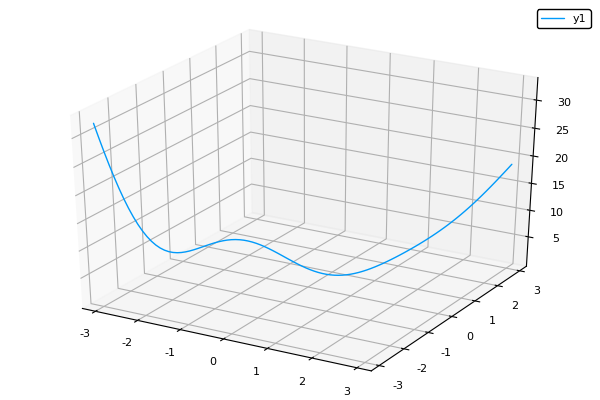

In [115]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
using Plots
using PyPlot;
pyplot()
x =  range(-3,stop = 3,length=100);
y =  range(-3,stop = 3,length=100);
plot(x,y,f.(x,x))

### <span style="color:#00B8DE"> II - Backtracking </span>

In [178]:
# Gradient algorithm
# constant stepsize 0.1
#-------------------
using LinearAlgebra: norm
precision = 1.e-8
max_iter  = 10e4
init      = [-5,-.5]
init      = [-4, -2]

# Constant stepsize
step_size = 0.1;
pt         = init
nb_const   = 0 # number of loops
resu_const = pt
while norm(pt-opt)>precision && nb_const<max_iter
    pt = pt - step_size * ∇f(pt[1],pt[2]);
    resu_const  = [resu_const pt]
    nb_const += 1;
end

print("Step size: ",step_size, ", number of iterations: ", nb_const,", residual error: ", norm(pt-opt))

Step size: 0.1, number of iterations: 99, residual error: 9.711428331416231e-9

In [179]:
# Constant stepsize 0.01
step_size = 0.01;
pt         = init
nb_const   = 0 # number of loops
resu_const = pt
while norm(pt-opt)>precision && nb_const<max_iter
    pt = pt - step_size * ∇f(pt[1],pt[2]);
    resu_const  = [resu_const pt]
    nb_const += 1;
end

print("Step size: ",step_size, ", number of iterations: ", nb_const,", residual error: ", norm(pt-opt))

Step size: 0.01, number of iterations: 1491, residual error: 9.980669083616282e-9

In [2]:
# Backtracking
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    alpha = 0.25; #0<alpha<0.5
    beta = 0.5; #0<beta<1
    t = 1;
    n = 0;
    while f(x[1]+t*d[1],x[2]+t*d[2])>f(x[1],x[2])+alpha*t*transpose(∇f(x[1],x[2]))*d
     #  x = x - t*d;
        t = beta*t;
        n = n+1;
    end
    y = x + t*d;
        
    return y, n
end

backtracking (generic function with 1 method)

In [181]:
# Gradient algorithm
# with backtracking
#-------------------
pt             = init
nb_iter_grad   = 0  # number of loops
nb_loops_grad  = 0  # number of inner loops count for backtracking
resu_grad      = pt
while norm(pt-opt)>precision && nb_iter_grad<max_iter
    nb_iter_grad  += 1;
    pt,n = backtracking(pt,f,∇f,-∇f(pt[1],pt[2]));
    resu_grad = [resu_grad pt];
    nb_loops_grad += n
end

In [182]:
println("Error with constant stepsize: $(norm(resu_const[:,end]-opt))")
println("Number of iterations with constant stepsize: $nb_const\n\n")
    
println("Error with backtracking: $(norm(resu_grad[:,end]-opt))")
println("Number of iterations for backtracking= $nb_iter_grad")
println("Number of inner loops for backtracking = $nb_loops_grad")

Error with constant stepsize: 9.980669083616282e-9
Number of iterations with constant stepsize: 1491


Error with backtracking: 8.091845093563052e-9
Number of iterations for backtracking= 24
Number of inner loops for backtracking = 57


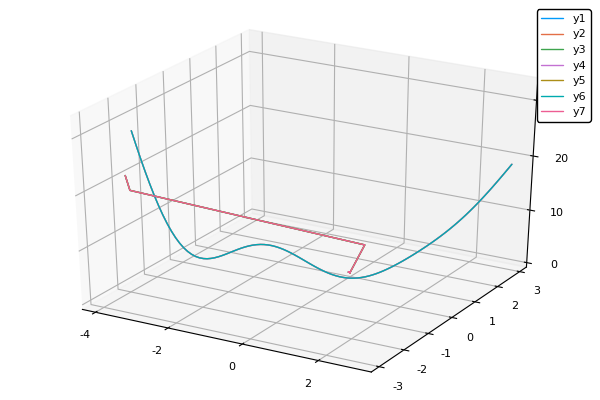

In [183]:
# Figure
#using Plots
using PyPlot;
pyplot()
n=100;
x =  range(-3,stop = 3,length=100);
y =  range(-3,stop = 3,length=100);
plot!(x,y,f.(x,y))
plot!(resu_grad[1,:],resu_grad[2,:],f.(resu_grad[1,:],resu_grad[2,:]))

In [184]:
a = [1 2;2 2]
inv(a)

2×2 Array{Float64,2}:
 -1.0   1.0
  1.0  -0.5

### <span style="color:#00B8DE"> III - Gradient and Newton </span>

In [191]:
# Newton algorithm (with backtracking)
#-------------------------------------

using LinearAlgebra: inv

∇2f(x,y) = [2*sin(y-1)^2+2 4*(x-2)*sin(y-1)*cos(y-1);4*(x-2)*cos(y-1)*sin(y-1) 2*(x-2)^2*cos(2*y-2)+2]

pt        = init;
nb_iter   = 0        # number of loops
nb_loops  = 0        # number of inner loops count for backtracking
resu_N    = pt
precision = 1.e-8
max_iter  = 10e4

while norm(pt-opt)>precision && nb_iter<max_iter
    pt,n = backtracking(pt,f,∇f,-inv(∇2f(pt[1],pt[2]))*∇f(pt[1],pt[2]))
    nb_iter += 1;
    nb_loops += n
    resu_N    = [resu_N pt]
    
end

In [192]:
println("Error with Newton+backtracking: $(norm(resu_N[:,end]-opt))")
println("Number of iterations for Newton= $nb_iter")
println("Nnumber of inner loops for Newton = $nb_loops")

Error with Newton+backtracking: 4.67011063175362e-12
Number of iterations for Newton= 9
Nnumber of inner loops for Newton = 2


In [193]:
using LinearAlgebra: eigvals
println(eigvals(∇2f(pt[1],pt[2])))

[1.7083208004577217, 8.97065095706624]


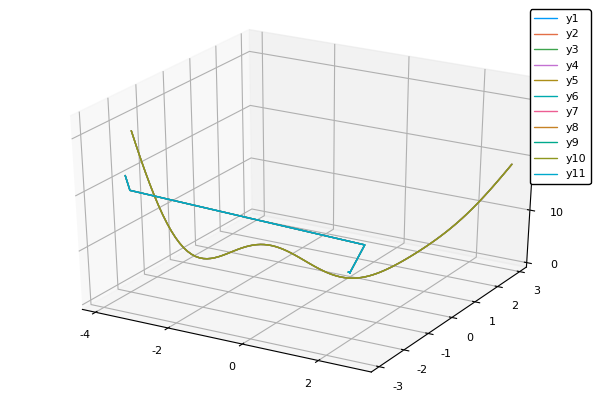

In [195]:
# Figure: gradient and Newton with backtracking
using PyPlot;
pyplot()
n=100;
x =  range(-3,stop = 3,length=100);
y =  range(-3,stop = 3,length=100);
plot!(x,y,f.(x,y))
plot!(resu_grad[1,:],resu_grad[2,:],f.(resu_grad[1,:],resu_grad[2,:]))

### <span style="color:#00B8DE"> IV - Conjugate gradient </span>

In [3]:
using LinearAlgebra: norm

A=[1 0;0 5]
b=[1,1]
p(x,y)  = 1/2*transpose([x,y])*A*[x,y] - transpose(b)*[x,y]
∇p(x,y) = 1/2*(A + transpose(A)) * [x,y] - b
opt= inv(1/2*(A + transpose(A)))*b #the solution is when the gradient goes to zero

2-element Array{Float64,1}:
 1.0
 0.2

In [4]:
precision = 1.e-8
max_iter  = 10e4
init      = [-2,3]

# optimal stepsize
pt            = init
nb_opt_grad   = 0 # number of loops
nb_loops_grad = 0
resu_opt_grad = pt
while norm(pt-opt)>precision && nb_opt_grad<max_iter
    nb_opt_grad  += 1;
    pt,n = backtracking(pt,p,∇p,-∇p(pt[1],pt[2]));
    resu_opt_grad = [resu_opt_grad pt];
    nb_loops_grad += n
end

In [5]:
println("Error with gradient with optimal stepsize: $(norm(resu_opt_grad[:,end]-opt))")
println("Number of iterations = $nb_opt_grad")

Error with gradient with optimal stepsize: 7.12639086195702e-9
Number of iterations = 41


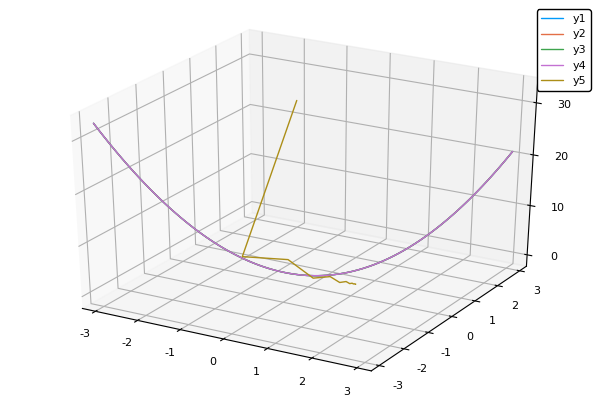

In [32]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
using Plots
pyplot()
x =  range(-3,stop = 3,length=100);
y =  range(-3,stop = 3,length=100);
plot!(x,y,p.(x,y))
plot!(resu_opt_grad[1,:],resu_opt_grad[2,:],p.(resu_opt_grad[1,:],resu_opt_grad[2,:]))

In [10]:
# Conjugate gradient
#--------------------
pt          = init
nb_iter_CG  = 0        # number of iterations
nb_loops_CG = 0        # number of inner loops count for backtracking
err_CG      = norm(pt-opt)

# initialization
d = - ∇p(pt[1],pt[2])
resu_CG = pt
            
# iterations
for k = 1:2
    g = ∇p(pt[1],pt[2])
    alpha = -transpose(g)*d/(transpose(d)*A*d)
    pt = pt + alpha * d
    
    g = ∇p(pt[1],pt[2])
    beta = transpose(g)*A*d /(transpose(d)*A*d)
    d = -g + beta * d
    
    err_CG = [err_CG norm(pt-opt)]
    resu_CG = [resu_CG pt]
    nb_iter_CG += 1
end

In [11]:
println("Error with CG: $(err_CG[end])")
println("Error number of iterations with CG: $(size(resu_CG)[2])")

Error with CG: 4.47545209131181e-16
Error number of iterations with CG: 3


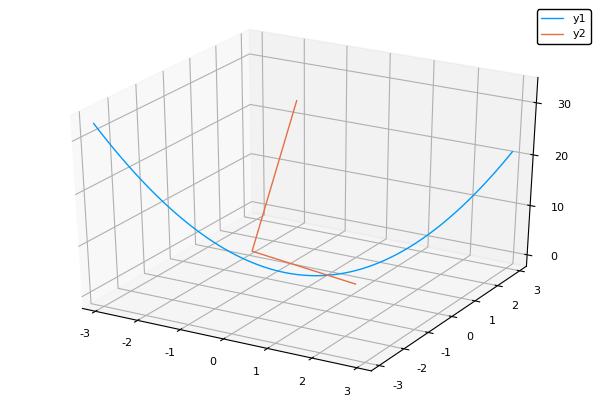

In [13]:
# Figure: gradient with optimal step
using Plots;
pyplot()
n=100;
x =  range(-3,stop = 3,length=100);
y =  range(-3,stop = 3,length=100);
plot!(x,y,p.(x,y))
plot!(resu_CG[1,:],resu_CG[2,:],p.(resu_CG[1,:],resu_CG[2,:]))

### A larger problem

Size of the problem: n = 10
Condition number of the matrix: 20.166989800978804


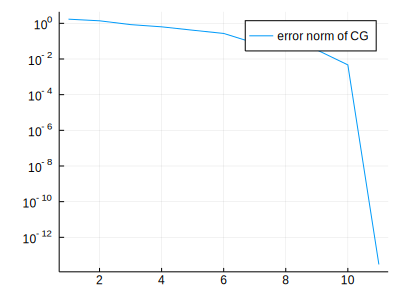

In [21]:
using LinearAlgebra: cond, diagm, norm;
using Plots;

n = 10
A = randn(n,n)
A = A'*A + diagm(0=>ones(n))
println("Size of the problem: n = ", n)
println("Condition number of the matrix: ", cond(A))
b = randn(n)
opt= inv(1/2*(A + transpose(A)))*b #the solution is when the gradient goes to zero

pt          = randn(n)
err_CG      = norm(pt.-opt)

# initialization
d = b-A*pt
resu_CG = pt
            
# iterations
for k = 1:n
    g = A*pt-b
    alpha = -transpose(g)*d/(transpose(d)*A*d)
    pt = pt + alpha * d
    
    g = A*pt-b
    beta = transpose(g)*A*d /(transpose(d)*A*d)
    d = -g + beta * d
    
    resu_CG = [resu_CG pt]
    err_CG = [err_CG;norm(pt.-opt)]
end
plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))

Size of the problem: n = 10
Condition number of the matrix: 2395.318551693505


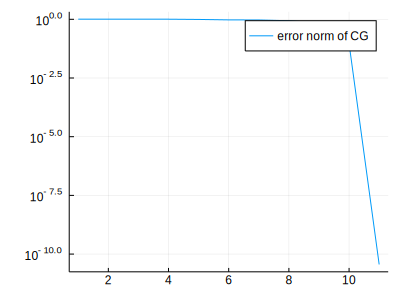

In [18]:
n = 10
A = randn(n,n)
A = A'*A
println("Size of the problem: n = ", n)
println("Condition number of the matrix: ", cond(A))
b = randn(n)
opt= inv(1/2*(A + transpose(A)))*b #the solution is when the gradient goes to zero

pt          = randn(n)
err_CG      = norm(pt.-opt)

# initialization
d = b-A*pt
resu_CG = pt
            
# iterations
for k = 1:n
    g = A*pt-b
    alpha = -transpose(g)*d/(transpose(d)*A*d)
    pt = pt + alpha * d
    
    g = A*pt-b
    beta = transpose(g)*A*d /(transpose(d)*A*d)
    d = -g + beta * d
    
    resu_CG = [resu_CG pt]
    err_CG = [err_CG;norm(pt.-opt)]
end
plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))

Size of the problem: n = 100
Condition number of the matrix: 389.1608806404599


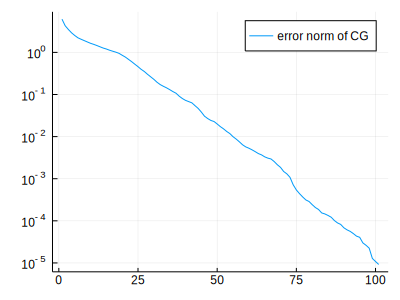

In [19]:
n = 100
A = randn(n,n)
A = A'*A + diagm(0=>ones(n))
println("Size of the problem: n = ", n)
println("Condition number of the matrix: ", cond(A))
b = randn(n)
opt= inv(1/2*(A + transpose(A)))*b #the solution is when the gradient goes to zero

pt          = randn(n)
err_CG      = norm(pt.-opt)

# initialization
d = b-A*pt
resu_CG = pt
            
# iterations
for k = 1:n
    g = A*pt-b
    alpha = -transpose(g)*d/(transpose(d)*A*d)
    pt = pt + alpha * d
    
    g = A*pt-b
    beta = transpose(g)*A*d /(transpose(d)*A*d)
    d = -g + beta * d
    
    resu_CG = [resu_CG pt]
    err_CG = [err_CG;norm(pt.-opt)]
end
plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))

Size of the problem: n = 10
Condition number of the matrix: 4249.507214801066


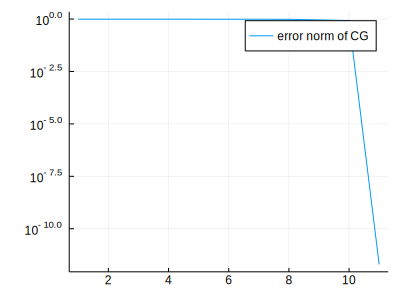

In [20]:
n = 10
A = randn(n,n)
A = A'*A
println("Size of the problem: n = ", n)
println("Condition number of the matrix: ", cond(A))
b = randn(n)
opt= inv(1/2*(A + transpose(A)))*b #the solution is when the gradient goes to zero

pt          = randn(n)
err_CG      = norm(pt.-opt)

# initialization
d = b-A*pt
resu_CG = pt
            
# iterations
for k = 1:n
    g = A*pt-b
    alpha = -transpose(g)*d/(transpose(d)*A*d)
    pt = pt + alpha * d
    
    g = A*pt-b
    beta = transpose(g)*A*d /(transpose(d)*A*d)
    d = -g + beta * d
    
    resu_CG = [resu_CG pt]
    err_CG = [err_CG;norm(pt.-opt)]
end
plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))

The condition number states whether the problem is well (small condition number) or ill-defined (big condition number).The output of an ill-defined problem is too dependant of the initial conditions. We can see that by eliminating the deterministic diagonal part of the matrix A, the problem gets more ill-defined and the final error achieved is bigger ; we can also see how the evolution of the error with the iterations changes.

It can also be noted that the final error increases with the size of the problem.

### <span style="color:#00B8DE"> V - Polak-Ribière </span>

#### <span style="color:#00B8DE">Polack-Ribière method</span>

Initialization: 

> 1. initialize ${\bf x_0}$ and calculate $\Delta {\bf x_0}$, where $\Delta {\bf x_n}= - \nabla f ({\bf x_n})$ 
> 2. $\alpha_0 = \arg \min_\alpha f({\bf x_0}+\alpha \Delta {\bf x_0})$
> 3. ${\bf x_1}={\bf x_0}+\alpha_0 \Delta {\bf x_0}$

Iterations: 

> 1. $\beta_{n} = \frac{\nabla f ({\bf x_n})^{\top} (\nabla f ( {\bf x_n})-\nabla f ({\bf x_{n-1}}))} {\nabla f ({\bf x_{n-1})^{\top}} \nabla f ({\bf x_{n-1}})}$
> 2. ${\bf d_n}= -\nabla f ({\bf x_n})+\beta_n {\bf d_{n-1}}$
> 3. $\alpha_n=\arg \min_{\alpha} f({\bf x_n}+\alpha {\bf d_n})$
> 4. ${\bf x_{n+1}}={\bf x_n}+\alpha_{n} {\bf d_n}$


In [ ]:
# Polak-Ribière
#---------------
pt          = init
nb_iter_PR  = 0        # number of iterations
nb_loops_PR = 0        # number of inner loops count for backtracking
resu_PR     = pt

# initialization
...

# iterations
while norm(pt-opt)>precision && nb_iter_PR<max_iter
    ...
end

In [ ]:
println("Error with gradient = $(norm(resu_grad[:,end]-opt))")
println("Number of iterations = $nb_iter_grad")
println("Number of inner loops = $nb_loops_grad\n")

println("Error with Polack-Ribière = $(norm(resu_PR[:,end]-opt))")
println("Number of iterations = $nb_iter_PR")
println("Number of inner loops = $nb_loops_PR")

In [ ]:
#Figure: Gradient and Polack-Ribière (with backtraking)
...